# Problem Statement

# Perform sentimental analysis:
Perform sentimental analysis on the Elon-musk tweets (Exlon-musk.csv)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [3]:
tweets = pd.read_csv(r"C:\Users\racha\Downloads\Elon_musk.csv",encoding='cp1252')
tweets

,Unnamed: 0,Text
0,1,@kunalb11 I’m an alien
1,2,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,3,@joerogan @Spotify Great interview!
3,4,@gtera27 Doge is underestimated
4,5,@teslacn Congratulations Tesla China for amazi...
...,...,...
1994,1995,"@flcnhvy True, it sounds so surreal, but the n..."
1995,1996,@PPathole Make sure to read ur terms &amp; con...
1996,1997,@TeslaGong @PPathole Samwise Gamgee
1997,1998,@PPathole Altho Dumb and Dumber is <U+0001F525...


In [4]:
tweets.drop(['Unnamed: 0'], inplace= True, axis= 1)
tweets

,Text
0,@kunalb11 I’m an alien
1,@ID_AA_Carmack Ray tracing on Cyberpunk with H...
2,@joerogan @Spotify Great interview!
3,@gtera27 Doge is underestimated
4,@teslacn Congratulations Tesla China for amazi...
...,...
1994,"@flcnhvy True, it sounds so surreal, but the n..."
1995,@PPathole Make sure to read ur terms &amp; con...
1996,@TeslaGong @PPathole Samwise Gamgee
1997,@PPathole Altho Dumb and Dumber is <U+0001F525...


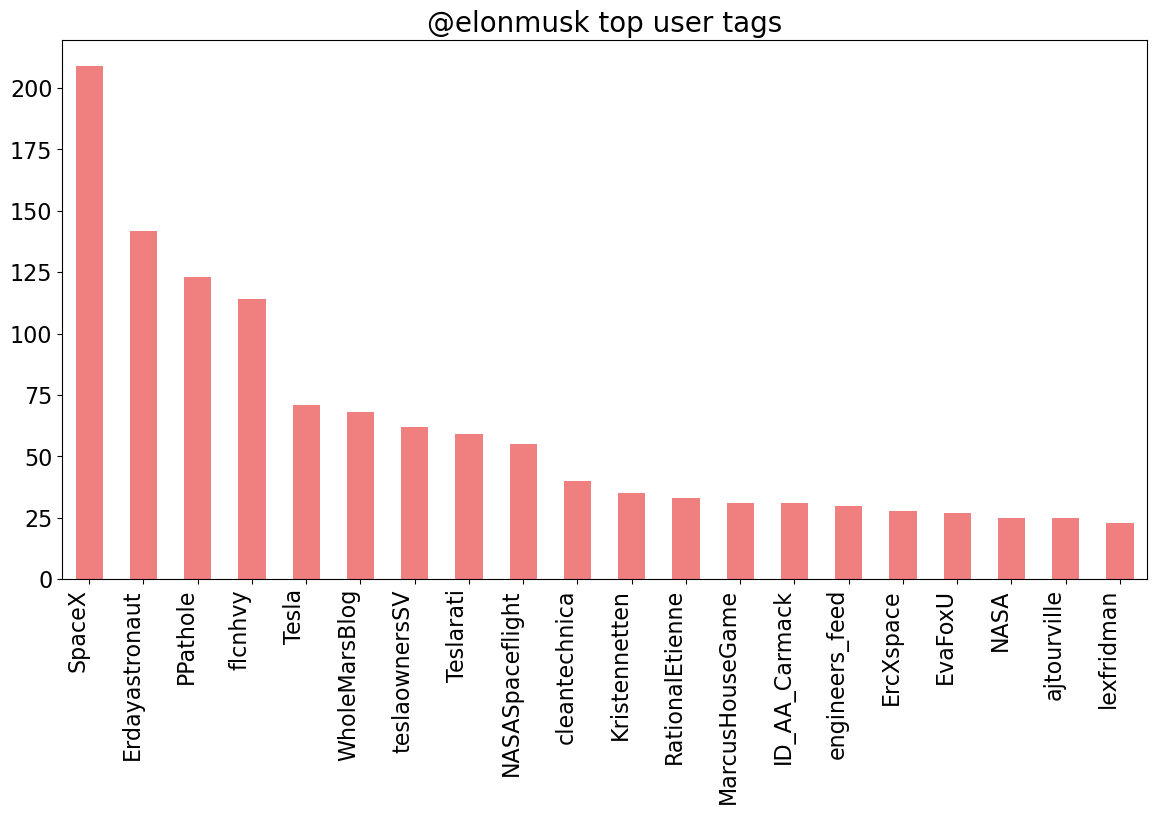

In [6]:
import itertools

c = list(itertools.chain(*tweets.Text.map(lambda t: [handle.replace(":", "")[1:] for handle in t.split(" ")
                                                     if '@' in handle.replace(":", "")]).tolist()))

pd.Series(c).value_counts().head(20).plot.bar(figsize=(14, 7), fontsize=16, color='lightcoral')
plt.gca().set_title('@elonmusk top user tags', fontsize=20)
plt.gca().set_xticklabels(plt.gca().get_xticklabels(), rotation=90, ha='right', fontsize=16)
pass

# BasicText Preprocessing
Cleaning the text by removing irrelevant information

In [7]:
import re #regular expression
import string

def clean_text(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub("[0-9" "]+"," ",text)
    text = re.sub('[‘’“”…]', '', text)
    return text

clean = lambda x: clean_text(x)

tweets["Text"] = tweets["Text"].apply(clean_text) # Clean The Text
tweets.head(11)

,Text
0,im an alien
1,idaacarmack ray tracing on cyberpunk with hdr ...
2,joerogan spotify great interview
3,doge is underestimated
4,teslacn congratulations tesla china for amazin...
5,happy new year of the ox
6,frodo was the underdoge\nall thought he would ...
7,owensparks flcnhvy haha thanks
8,flcnhvy indeed tweets definitely do not repre...
9,the most entertaining outcome is the most likely


# Word Frequency

In [8]:
freq = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq

the               487
to                400
a                 356
is                355
of                315
spacex            239
in                219
amp               218
for               194
tesla             166
will              165
be                157
erdayastronaut    142
this              140
it                138
we                136
on                129
that              128
rt                127
but               126
Name: count, dtype: int64

# Removing Stopwords


In [9]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
from nltk.corpus import stopwords
stop = stopwords.words('english')
tweets['Text'] = tweets['Text'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [13]:
freq_stp = pd.Series(' '.join(tweets['Text']).split()).value_counts()[:20] # for top 20
freq_stp

spacex             239
amp                218
tesla              166
erdayastronaut     142
rt                 127
ppathole           123
flcnhvy            114
yes                 86
great               76
teslaownerssv       73
wholemarsblog       68
teslarati           59
nasaspaceflight     55
haha                55
good                51
launch              49
sure                43
yeah                41
cleantechnica       40
would               40
Name: count, dtype: int64

# Basic Feature Extaction
Count vectoriser tells the frequency of a word.

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(min_df=1, max_df=0.9)
X = vectorizer.fit_transform(tweets["Text"])
feature_names = vectorizer.get_feature_names_out()

word_freq_df = pd.DataFrame({
    'term': feature_names, 
    'occurrences': np.asarray(X.sum(axis=0)).ravel().tolist()
})

word_freq_df['frequency'] = word_freq_df['occurrences'] / np.sum(word_freq_df['occurrences'])

word_freq_df.head(11)


,term,occurrences,frequency
0,aber,1,0.000076
1,able,6,0.000453
2,abo,1,0.000076
3,aboard,1,0.000076
4,abort,3,0.000227
5,absence,1,0.000076
6,absolute,1,0.000076
7,absolutely,15,0.001133
8,absorb,1,0.000076
9,absorption,1,0.000076


# TFIDF - Term frequency inverse Document Frequencyt

In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(stop_words='english', max_features=1000, max_df=0.5, smooth_idf=True)
doc_vec = vectorizer.fit_transform(tweets["Text"])
names_features = vectorizer.get_feature_names_out()

dense = doc_vec.todense()
denselist = dense.tolist()
df = pd.DataFrame(denselist, columns=names_features)
df


,able,abort,absolutely,access,accurate,actual,actually,adamklotz,add,adding,...,yeah,year,years,yes,yesterdays,youre,yourfavgas,yup,zero,zone
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.356742,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# N-gram

# Bi-gram

In [17]:
def get_top_n2_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(2,2), max_features=2000).fit(corpus) #for tri-gram, put ngram_range=(3,3)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq = sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [18]:
top2_words = get_top_n2_words(tweets["Text"], n=200) #top 200
top2_df = pd.DataFrame(top2_words)
top2_df.columns = ["Bi-gram", "Freq"]
top2_df.head(11)

,Bi-gram,Freq
0,rt spacex,71
1,spacex falcon,17
2,erdayastronaut spacex,16
3,pretty much,12
4,rt nasa,12
5,waemd spacex,11
6,giga berlin,10
7,first stage,10
8,teslaratiteam teslarati,10
9,nasa spacex,9


# Bi-gram plot

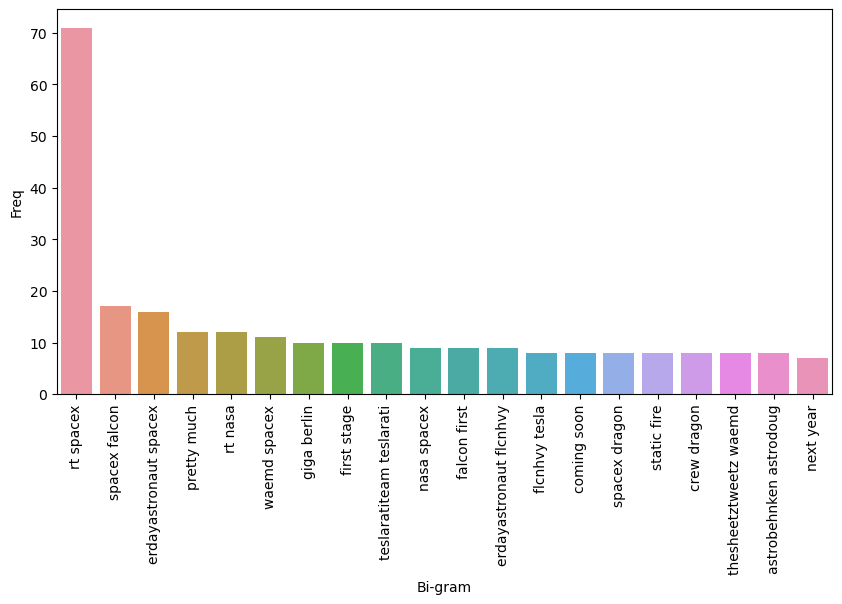

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
top20_bigram = top2_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_bigram["Bi-gram"],y=top20_bigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_bigram["Bi-gram"]);

# Tri-gram

In [20]:
def get_top_n3_words(corpus, n=None):
    vec1 = CountVectorizer(ngram_range=(3,3), max_features=2000).fit(corpus)
    bag_of_words = vec1.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec1.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [21]:
top3_words = get_top_n3_words(tweets["Text"], n=200)
top3_df = pd.DataFrame(top3_words)
top3_df.columns = ["Tri-gram", "Freq"]
top3_df.head(11)

,Tri-gram,Freq
0,rt spacex falcon,17
1,falcon first stage,9
2,spacex falcon first,8
3,thesheetztweetz waemd spacex,8
4,course still love,7
5,ppathole thesheetztweetz waemd,7
6,waemd spacex spacexstarlink,7
7,first stage landed,6
8,rt spacex liftoff,6
9,spacex spacexstarlink wanationalguard,6


# Tri-gram plot

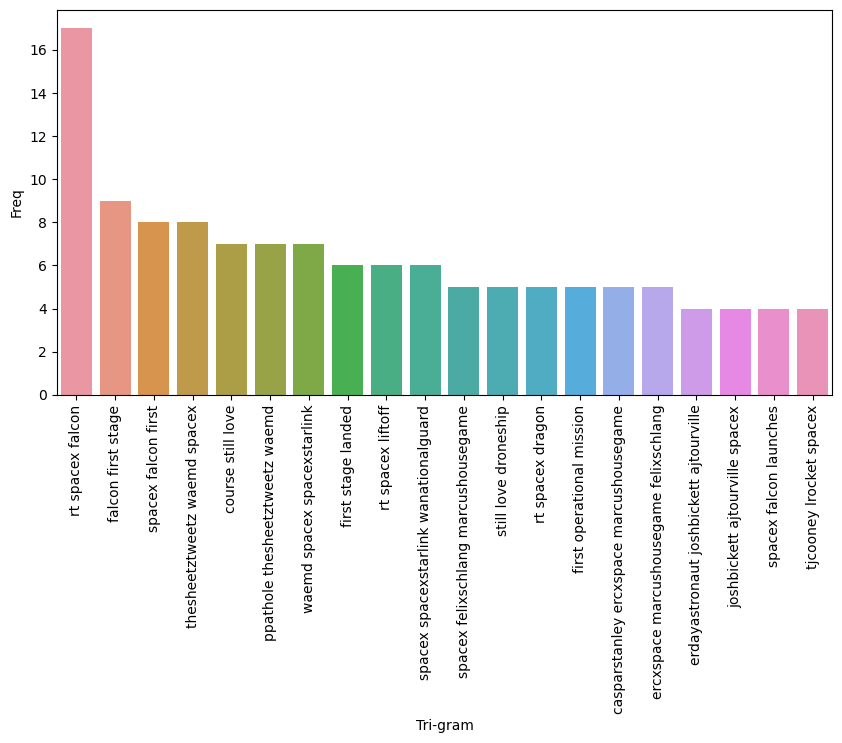

In [22]:
import seaborn as sns
top20_trigram = top3_df.iloc[0:20,:]
fig = plt.figure(figsize = (10, 5))
plot = sns.barplot(x=top20_trigram["Tri-gram"],y=top20_trigram["Freq"])
plot.set_xticklabels(rotation=90,labels = top20_trigram["Tri-gram"]);

# Subjectivity and Polarity

In [29]:
!pip install textblob


   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 281.8 kB/s eta 0:00:03
   ----- --------------------------------- 92.2/626.3 kB 525.1 kB/s eta 0:00:02
   ----- --------------------------------- 92.2/626.3 kB 525.1 kB/s eta 0:00:02
   ------ ------------------------------- 102.4/626.3 kB 368.6 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 473.7 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 473.7 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 473.7 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 473.7 kB/s eta 0:00:02
   -------- ----------------------------- 143.4/626.3 kB 473.7 kB/s eta 0:

In [30]:
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('brown')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.
[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\brown.zip.


True

In [33]:
from textblob import TextBlob

# Get The Subjectivity
def sentiment_analysis(ds):
    sentiment = TextBlob(ds["Text"]).sentiment
    return pd.Series([sentiment.subjectivity, sentiment.polarity])

# Adding Subjectivity & Polarity
tweets[["subjectivity", "polarity"]] = tweets.apply(sentiment_analysis, axis=1)
tweets.head(11)

,Text,subjectivity,polarity
0,im alien,0.750000,-0.250000
1,idaacarmack ray tracing cyberpunk hdr nextleve...,0.000000,0.000000
2,joerogan spotify great interview,0.750000,0.800000
3,doge underestimated,0.000000,0.000000
4,teslacn congratulations tesla china amazing ex...,0.322222,0.200000
5,happy new year ox,0.727273,0.468182
6,frodo underdoge thought would fail httpstcozgx...,0.300000,-0.500000
7,owensparks flcnhvy haha thanks,0.250000,0.200000
8,flcnhvy indeed tweets definitely represent rea...,0.500000,0.000000
9,entertaining outcome likely,0.850000,0.250000


In [34]:
!pip install wordcloud


   ---------------------------------------- 0.0/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   - -------------------------------------- 10.2/300.2 kB ? eta -:--:--
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   ------- ------------------------------- 61.4/300.2 kB 409.6 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 481.4 kB/s eta 0:00:01
   --------------- ---------------------- 122.9/300.2 kB 481.4 kB/s eta 0:00:01
   ------------------ ------------------- 143.4/300.2 kB 405.9 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 567.2 kB/s eta 0:00:01
   ------------------------- ------------ 204.8/300.2 kB 567.2 kB/s eta 0:00:01
   -------------------------------------- 300.2/300.2 kB 640.0 kB/s eta 0:00:00


# Creating a Wordcloud

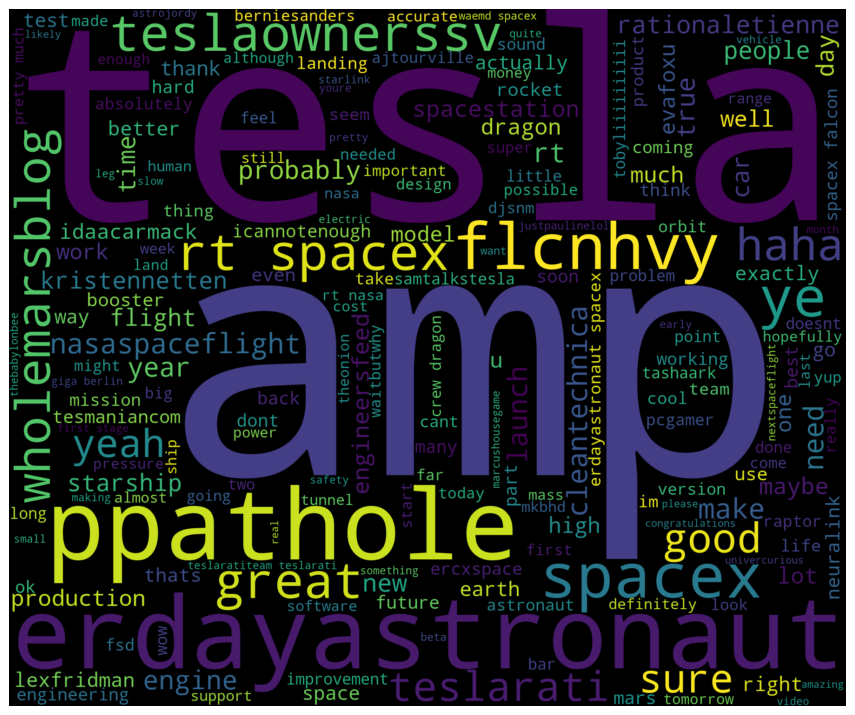

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

allwords = " ".join([twts for twts in tweets["Text"]])
wordCloud = WordCloud(width = 1800, height = 1500, random_state = 21).generate(allwords)
plt.figure(figsize=(12,12), dpi=90)
plt.imshow(wordCloud, interpolation = "bilinear")
plt.axis("off")
plt.show()

In [36]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [37]:
# Compute The Negative, Neutral, Positive Analysis
def analysis(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
# Create a New Analysis Column
tweets["analysis"] = tweets["polarity"].apply(analysis)

In [38]:
positive_tweets = tweets[tweets['analysis'] == 'Positive']
negative_tweets = tweets[tweets['analysis'] == 'Negative']

print('positive tweets')
for i, row in positive_tweets[:5].iterrows():
    print(' -' + row['Text'])

print('negative tweets')
for i, row in negative_tweets[:5].iterrows():
    print(' -' + row['Text'])

positive tweets
 -joerogan spotify great interview
 -teslacn congratulations tesla china amazing execution last year next even
 -happy new year ox
 -owensparks flcnhvy haha thanks
 -entertaining outcome likely
negative tweets
 -im alien
 -frodo underdoge thought would fail httpstcozgxjfdzzrm
 -freewalletorg app sucks
 -rationaletienne adamklotz starlink staggeringly difficult technical amp economic endeavor however
 -rationaletienne adamklotz spacex needs pass deep chasm negative cash flow next year


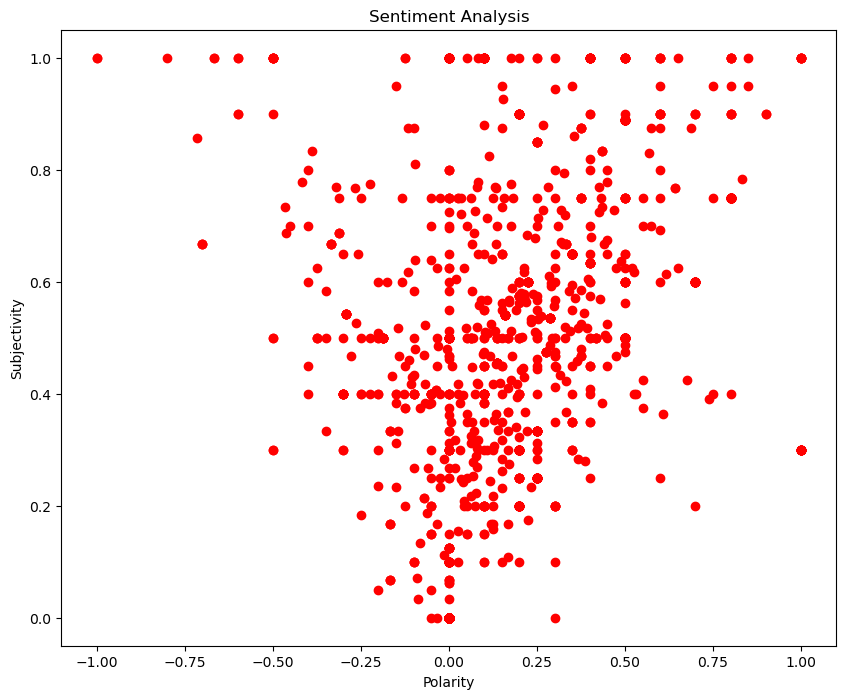

In [39]:
plt.figure(figsize=(10, 8))

for i in range(0, tweets.shape[0]):
    plt.scatter(tweets["polarity"][i], tweets["subjectivity"][i], color = "Red")

plt.title("Sentiment Analysis") # Add The Graph Title
plt.xlabel("Polarity") # Add The X-Label
plt.ylabel("Subjectivity") # Add The Y-Label
plt.show() # Showing The Graph

In [40]:
(len(positive_tweets) / len(negative_tweets))*100

422.11055276381904

Since that number is positive, and quite high of a ratio, we can also conclude that Elon Musk is a positive guy.

# Perform sentimental analysis:

1) Extract reviews of any product from ecommerce website like amazon
2) Perform emotion mining

In [41]:
import re
import nltk
import spacy
import codecs
import requests

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from textblob import TextBlob
from bs4 import BeautifulSoup
from tqdm import tqdm_notebook
from wordcloud import WordCloud
from nltk.corpus import stopwords
from bs4 import BeautifulSoup as bs
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

import warnings
warnings.filterwarnings('ignore')

In [42]:
headers = {'authority': 'www.amazon.in',
           'accept-language': 'en-US,en;q=0.9',
           'referer': 'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/dp/B0B574QXFL/ref=sr_1_3?adgrpid=66314740727&ext_vrnc=hi&gclid=CjwKCAiAheacBhB8EiwAItVO27OqojMgIrqr8l4RkhJXVEgEYEy5H4Hv_ggVfrdU-8RF6WYv_aDItRoCKvwQAvD_BwE&hvadid=398059830400&hvdev=c&hvlocphy=1007768&hvnetw=g&hvqmt=b&hvrand=1335892987492695214&hvtargid=kwd-1434352673191&hydadcr=24569_1971431&keywords=boat+xtend+pro&qid=1671035479&sr=8-3',
           'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36'}

In [43]:
def get_soup(url):
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [44]:
reviewlist = []

def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
                      'Rating':float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
                      'Review':item.find('span', {'data-hook': 'review-body'}).text.strip(),
                      'Review_Date':item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India 🇮🇳 on', 'Reviewed in India on').strip()}
            reviewlist.append(review)
    except:
        pass

In [45]:
for x in tqdm_notebook(range(160)):
    soup = get_soup(f'https://www.amazon.in/boAt-Xtend-Pro-Dedicated-Bluetooth/product-reviews/B0B574QXFL/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    get_reviews(soup)
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/160 [00:00<?, ?it/s]

In [47]:
df = pd.DataFrame(reviewlist)
df

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,Reviewed in India on 2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,Reviewed in India on 27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",Reviewed in India on 5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",Reviewed in India on 28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,Reviewed in India on 9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,Reviewed in India on 30 May 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,Reviewed in India on 12 August 2021
7,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,Reviewed in India on 9 February 2024
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,Reviewed in India on 17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,Reviewed in India on 16 December 2021


In [48]:
df["Review_Date"] = df["Review_Date"].replace('Reviewed in India on','', regex=True)

In [49]:
df.head(50)

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [51]:
df.to_csv("BoatSmartWatch_Review.csv")

# Load Dataset

In [52]:
reviews = pd.read_csv('BoatSmartWatch_Review.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022
5,4.0 out of 5 stars\nGood watch for all but req...,4.0,My experience with the boAt Xtend Call Plus Sm...,30 May 2023
6,5.0 out of 5 stars\nBest Budget watch,5.0,The media could not be loaded.\n ...,12 August 2021
7,4.0 out of 5 stars\nGood smart watch,4.0,This smart watch is good value for money 💰. An...,9 February 2024
8,3.0 out of 5 stars\nNOt worth the money,3.0,Review OverviewAverage2.7The Boat today launch...,17 May 2022
9,4.0 out of 5 stars\nGood budget smart watch wi...,4.0,Pros:1. Premium build quality with matte finis...,16 December 2021


In [53]:
reviews.Rating.describe()

count    10.000000
mean      4.200000
std       0.788811
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Rating, dtype: float64

In [54]:
reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Title        10 non-null     object 
 1   Rating       10 non-null     float64
 2   Review       10 non-null     object 
 3   Review_Date  10 non-null     object 
dtypes: float64(1), object(3)
memory usage: 452.0+ bytes


In [56]:
reviews.isna().sum()

Title          0
Rating         0
Review         0
Review_Date    0
dtype: int64

In [57]:
reviews.dropna(subset=['Review'],inplace=True)
reviews.head()

,Title,Rating,Review,Review_Date
0,5.0 out of 5 stars\nI am satisfied with this p...,5.0,I am using smart watch for the first time. Mod...,2 March 2024
1,4.0 out of 5 stars\nGood product.,4.0,This smart (model Boat extend plus) watch is f...,27 August 2023
2,5.0 out of 5 stars\nNice product,5.0,"Very good ,nice and worth for money, super pro...",5 March 2024
3,5.0 out of 5 stars\nGifting someone & she sati...,5.0,"Easy to operate,good looks,good design,light w...",28 February 2024
4,3.0 out of 5 stars\nGood build quality & displ...,3.0,Skipping the parts mostly covered in other rev...,9 August 2022


# Data Visualization
Date vs Review Count

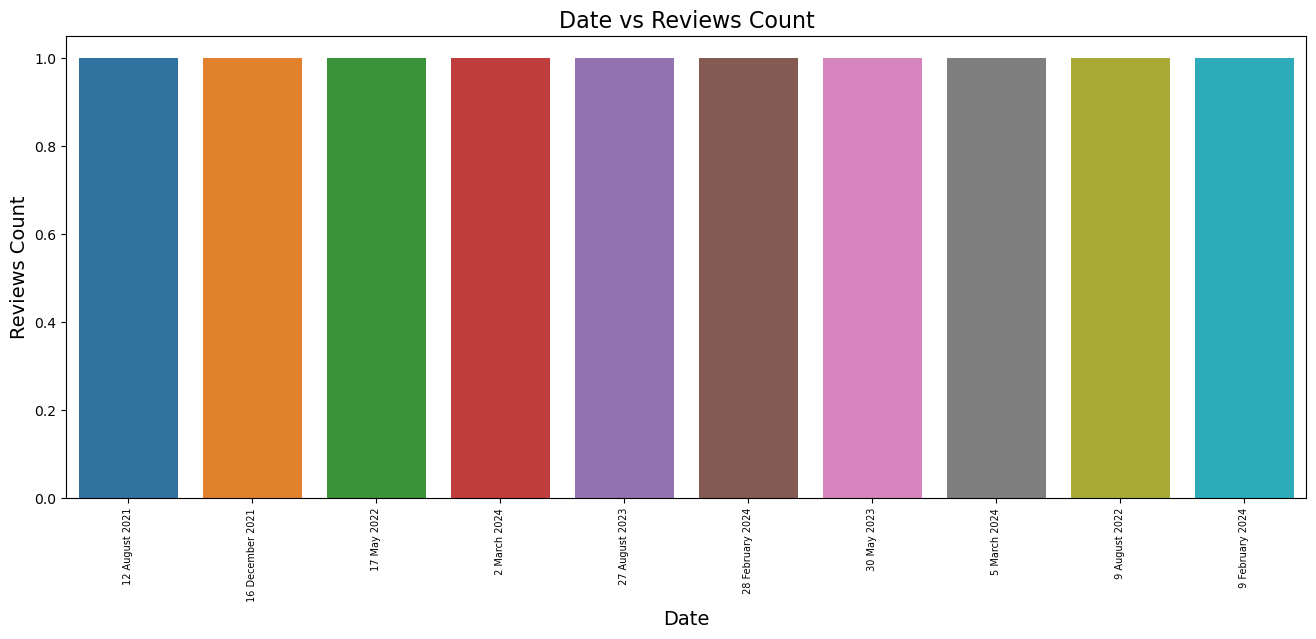

In [58]:
#Creating a dataframe
dayreview = pd.DataFrame(reviews.groupby('Review_Date')['Review'].count()).reset_index()
dayreview['Date'] = dayreview['Review_Date']
dayreview.sort_values(by = ['Review_Date'])

#Plotting the graph
plt.figure(figsize=(16,6))
sns.barplot(x = "Date", y = "Review", data = dayreview)
plt.title('Date vs Reviews Count', fontsize=16)
plt.xticks(rotation=90,fontsize=7)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Reviews Count',fontsize=14)
plt.show()

# Percentage of Ratings

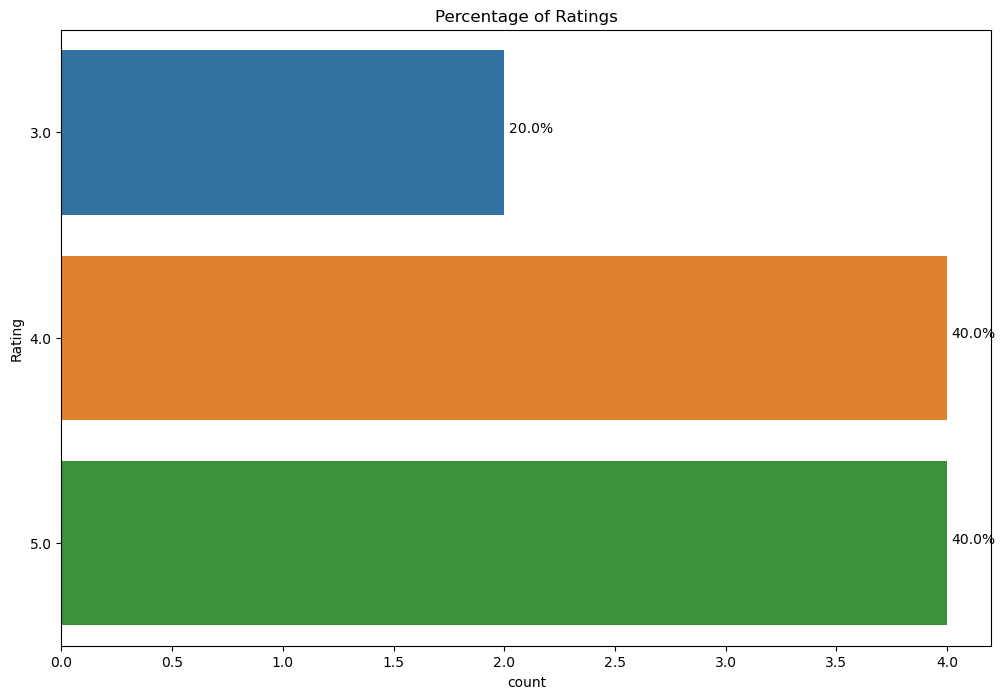

In [59]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

# BasicText Preprocessing for Sentiment Analysis
Spelling Correction

In [61]:
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))


0    I am using smart watch for the first time. Mod...
1    His smart (model Coat extend plus) watch is sa...
2    Very good ,nice and worth for money, super pro...
3    Easy to operate,good looks,good design,light w...
4    Shipping the parts mostly covered in other rev...
Name: Review, dtype: object

In [62]:
boat_review = reviews[['Review']]
boat_review

,Review
0,I am using smart watch for the first time. Mod...
1,This smart (model Boat extend plus) watch is f...
2,"Very good ,nice and worth for money, super pro..."
3,"Easy to operate,good looks,good design,light w..."
4,Skipping the parts mostly covered in other rev...
5,My experience with the boAt Xtend Call Plus Sm...
6,The media could not be loaded.\n ...
7,This smart watch is good value for money 💰. An...
8,Review OverviewAverage2.7The Boat today launch...
9,Pros:1. Premium build quality with matte finis...


# Resetting index

In [63]:
boat_review.reset_index(drop=True, inplace=True)

In [64]:
stop_words = stopwords.words('english')
boat_review['Review'] = boat_review['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() if x not in stop_words))

# Lemmatizer

In [65]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\racha\AppData\Roaming\nltk_data...


True

In [66]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(boat_review))):
    cleaned = re.sub('[^a-zA-Z]', " ", boat_review["Review"][i])
    cleaned = cleaned.lower()
    cleaned = cleaned.split()
    cleaned = [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned = ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/10 [00:00<?, ?it/s]

In [67]:
#Saving cleaned data to compare with original data, to ckeck amount of information lost
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": boat_review.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...


# Text Pre-processing Techniques
A. Removing '@names'

In [70]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text 

In [71]:
# We are keeping cleaned tweets in a new column called 'tidy_tweets'
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


B. Removing links (http | https)

In [72]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


C. Removing Review with empty text

In [73]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


D. Dropping duplicate rows

In [68]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,lowest price good quality,lowest price good quality
1,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
2,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
3,initially thought dark blue kind light blue de...,initially thought dark blue kind light blue de...
4,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
5,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,face pic allowed face watch working best activ...,face pic allowed face watch working best activ...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


E. Function to remove emoji

In [74]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [75]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


F. Removing Stop words

In [79]:
import codecs

with codecs.open(r"C:\Users\racha\Downloads\stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])


a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [80]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [81]:
my_stop_words = stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...
2,good nice worth money super product,"very good ,nice worth money, super product"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...


G. Tokenize 'Clean_Reviews'

In [82]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['smart', 'model', 'boat', 'extend', 'plus', 'watch', 'functioning', 'well', 'worth', 'price', 'r', 'battery', 'beginning', 'lasted', 'day', 'next', 'charge', 'lasted', 'day', 'last', 'settled', 'one', 'day', 'extensive', 'user', 'apps', 'amoled', 'display', 'good', 'touch', 'feature', 'good', 'access', 'apps', 'easily', 'reachable', 'simple', 'browsing', 'feature', 'sleep', 'measurement', 'good', 'taking', 'day', 'time', 'nap', 'night', 'time', 'showing', 'exactly', 'went', 'sleep', 'woke', 'spo', 'measurement', 'neaarer', 'measurement', 'personal', 'digital', 'instrument', 'heart', 'rate', 'measurement', 'also', 'nearer', 'instrument', 'stress', 'also', 'reflecting', 'nearly', 'real', 'condition', 'activity', 'step', 'showing', 'correct', 'distance', 'also', 'good', 'watch', 'taking', 'bike', 'ride', 'walking', 'showing', 'distance', 'covered', 'set', 'target', 'sport', 'feature', 'checked', 'yet', 'fully', 'checked', 'feature', 'functional', 'water', 'resistant', 'yes', 'wa

In [83]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [using, smart, watch, first, time, model, xten...
1    [smart, model, boat, extend, plus, watch, func...
2           [good, nice, worth, money, super, product]
3    [easy, operate, good, look, good, design, ligh...
4    [skipping, part, mostly, covered, review, spon...
5    [experience, boat, xtend, call, plus, smart, w...
6    [medium, could, loaded, used, watch, month, bo...
7    [smart, watch, good, value, money, feature, pa...
8    [review, overviewaverage, boat, today, launche...
9    [pro, premium, build, quality, matte, finishin...
Name: Clean_Reviews, dtype: object

In [84]:
dataframe['Tokenized_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten..."
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func..."
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]"
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig...","[easy, operate, good, look, good, design, ligh..."
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon..."
5,experience boat xtend call plus smart watch so...,my experience boat xtend call plus smart watch...,"[experience, boat, xtend, call, plus, smart, w..."
6,medium could loaded used watch month bought fi...,the media could loaded. used watch month now.....,"[medium, could, loaded, used, watch, month, bo..."
7,smart watch good value money feature packed pr...,this smart watch good value money 💰. and featu...,"[smart, watch, good, value, money, feature, pa..."
8,review overviewaverage boat today launched boa...,review overviewaverage2.7the boat today launch...,"[review, overviewaverage, boat, today, launche..."
9,pro premium build quality matte finishing stur...,pros:1. premium build quality matte finishing-...,"[pro, premium, build, quality, matte, finishin..."


# H. Converting words to Stemmer

In [85]:
stemmer = SnowballStemmer("english")

In [86]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,use smart watch first time model xtend boat rt...
1,smart model boat extend plus watch function we...
2,good nice worth money super product
3,easi oper good look good design light weight b...
4,skip part most cover review sponsor yt one add...
5,experi boat xtend call plus smart watch somewh...
6,medium could load use watch month bought first...
7,smart watch good valu money featur pack produc...
8,review overviewaverag boat today launch boat x...
9,pro premium build qualiti matt finish sturdi p...


# I. Converting words to Lemma

In [87]:
word_lemmatizer = WordNetLemmatizer()
yy = pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

,stemmed
0,using smart watch first time model xtend boat ...
1,smart model boat extend plus watch functioning...
2,good nice worth money super product
3,easy operate good look good design light weigh...
4,skipping part mostly covered review sponsored ...
5,experience boat xtend call plus smart watch so...
6,medium could loaded used watch month bought fi...
7,smart watch good value money feature packed pr...
8,review overviewaverage boat today launched boa...
9,pro premium build quality matte finishing stur...


# Basic Feature Extaction

A. Applying bag of Words without N grams

In [88]:
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)

In [89]:
print(cv.get_feature_names_out()[109:200])

['body' 'bother' 'bought' 'box' 'bp' 'break' 'breath' 'breathing' 'bright'
 'brightness' 'brings' 'browsing' 'brushed' 'bt' 'budget' 'bug' 'build'
 'buildi' 'built' 'bulb' 'burnt' 'button' 'buy' 'buying' 'cable' 'cache'
 'calculated' 'calculation' 'calculator' 'calender' 'call' 'called'
 'caller' 'calling' 'calorie' 'calory' 'cals' 'camera' 'cannot'
 'carddesign' 'care' 'cart' 'case' 'category' 'catering' 'change'
 'changed' 'charge' 'charger' 'charging' 'charm' 'cheap' 'check' 'checked'
 'checking' 'childish' 'chinese' 'claim' 'claimed' 'classic' 'clean'
 'clear' 'clearing' 'clearly' 'click' 'clipuser' 'clone' 'close' 'cloud'
 'color' 'colour' 'colourcharging' 'combi' 'come' 'comfortable'
 'comfortdisplaywatch' 'comfortwhen' 'coming' 'command' 'common' 'company'
 'compared' 'complain' 'complaining' 'completely' 'con' 'concern'
 'conclusion' 'condition' 'configuration' 'configure']


In [90]:
print(cv.get_feature_names_out()[:100])

['absolutely' 'ac' 'accept' 'acceptable' 'acceptance' 'accepts' 'access'
 'accessibility' 'accidentally' 'account' 'accuracy' 'accuracybatteryyou'
 'accuracycomparing' 'accurate' 'accurately' 'activate' 'activating'
 'active' 'activites' 'activity' 'actual' 'actually' 'adapter' 'add'
 'added' 'addition' 'adjust' 'advanced' 'advertised' 'aggregate' 'ago'
 'alarm' 'alert' 'alexa' 'allowed' 'allowing' 'also' 'alternative'
 'aluminium' 'always' 'amazfit' 'amazon' 'amoled' 'amount' 'analog'
 'android' 'angle' 'animal' 'animation' 'anniversary' 'another' 'answer'
 'anything' 'anywhere' 'aod' 'apart' 'app' 'appaccuracyaccuracy'
 'appaccuracybatteryfinal' 'appearance' 'apple' 'apps' 'appyou' 'around'
 'aside' 'asks' 'aspect' 'assistant' 'assisted' 'atm' 'attached'
 'attaching' 'attention' 'attractive' 'audio' 'auto' 'available' 'average'
 'away' 'back' 'background' 'backup' 'bad' 'badge' 'band' 'bank' 'bar'
 'based' 'basic' 'bathing' 'battery' 'beautiful' 'bed' 'beginning'
 'believe' 'benefici

In [91]:
print(tweetscv.toarray()[100:200])

[]


B. CountVectorizer with N-grams (Bigrams & Trigrams)

In [92]:
dataframe = dataframe.reset_index(drop=True)

In [93]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [94]:
corpus[3]

'easi oper good look good design light weight best gift girlfriend lover life partner'

# Applying Countvectorizer (Creating the Bag of Words model)

In [95]:
cv = CountVectorizer(max_features=1546,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [96]:
X.shape

(10, 1546)

In [97]:
cv.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'alarm', 'alarm timer', 'alert', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'allow', 'also'], dtype=object)

In [98]:
cv.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.int64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'preprocessor': None,
 'stop_words': None,
 'strip_accents': None,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'vocabulary': None}

In [99]:
count_df = pd.DataFrame(X, columns=cv.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,would recommend,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,0,0,0
1,0,1,0,0,0,0,1,1,0,0,...,0,0,1,0,0,0,0,0,0,2
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,1,0,0,6,1,1,0,...,0,0,1,0,0,0,0,0,0,0
5,0,1,0,0,0,0,1,0,0,0,...,0,0,0,2,0,2,2,0,0,0
6,0,0,3,1,1,1,3,0,1,2,...,0,0,0,1,0,0,0,0,1,1
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,0,1,4,3,0,0,1,0,0,1,...,2,2,0,20,1,0,0,7,1,1
9,3,0,3,1,1,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0


C. TF-IDF Vectorizer

In [100]:
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/10 [00:00<?, ?it/s]

In [101]:
corpus[4]

'skip part mostli cover review sponsor yt one add irrit common sens disappoint notic sinc last day actual usag smart watch aod show date day week show hour min way configur beyond analog digit view also get turn start exercis activ like walk screen go dark go walk calori count home screen anywher els show step count calori aggreg calori burnt exercis activ e step cal cycl show home screen separ two entri app smart enough addit quick way go start activ exercis first press side button twice select activit list menu versu swipe home screen go utterli useless cricket score screen instead mani even use customis menu option function map provid touch wake display avail screen avail rupe yr old huwai band one press side button everi time see home screen utterli inconveni reach day night time auto configur aod twist wake provid make irrit sleep hour kept thu daili two time day task enabl disabl featur manual everi freak day kindli also note indic whatsoev aod start exercis activ start one like 

# Applying TF-IDF Vectorizer

In [102]:
tfidf_v = TfidfVectorizer(max_features=1546,ngram_range=(1,3))
X = tfidf_v.fit_transform(corpus).toarray()

In [103]:
X.shape

(10, 1546)

In [104]:
tfidf_v.get_feature_names_out()[:20]

array(['accept', 'access', 'accur', 'accuraci', 'accuraci sleep',
       'accuraci sleep track', 'activ', 'activ step', 'actual', 'ad',
       'add', 'alarm', 'alarm timer', 'alert', 'alexa', 'alexa support',
       'alexa watch', 'alexa work', 'allow', 'also'], dtype=object)

In [105]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 1546,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [106]:
count_df = pd.DataFrame(X, columns=tfidf_v.get_feature_names_out())
count_df

,accept,access,accur,accuraci,accuraci sleep,accuraci sleep track,activ,activ step,actual,ad,...,would recommend,would recommend go,wrist,xtend,xtend boat,xtend call,xtend call plu,xtend smartwatch,xtend watch,ye
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.099461,0.127870,0.000000,0.000000,0.00000,0.000000,0.000000
1,0.000000,0.032965,0.000000,0.000000,0.000000,0.000000,0.029604,0.042380,0.000000,0.000000,...,0.000000,0.000000,0.037078,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.074155
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
4,0.028531,0.022192,0.000000,0.022192,0.000000,0.000000,0.119579,0.028531,0.024961,0.000000,...,0.000000,0.000000,0.024961,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
5,0.000000,0.039332,0.000000,0.000000,0.000000,0.000000,0.035322,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.078663,0.000000,0.118965,0.118965,0.00000,0.000000,0.000000
6,0.000000,0.000000,0.072050,0.021353,0.027451,0.027451,0.057528,0.000000,0.024017,0.054903,...,0.000000,0.000000,0.000000,0.021353,0.000000,0.000000,0.000000,0.00000,0.027451,0.024017
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
8,0.000000,0.012265,0.055181,0.036795,0.000000,0.000000,0.011015,0.000000,0.000000,0.015768,...,0.037097,0.037097,0.000000,0.245297,0.015768,0.000000,0.000000,0.12984,0.015768,0.013795
9,0.092076,0.000000,0.080555,0.023873,0.030692,0.030692,0.000000,0.000000,0.026852,0.000000,...,0.000000,0.000000,0.026852,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000


D. Named Entity Recognition (NER)

In [107]:
reviews = [review.strip() for review in dataframe.Clean_Reviews]
reviews = [comment for comment in reviews if comment]
# Joining the list into one string/text
reviews_text = ' '.join(reviews)
reviews_text[0:2000]

'using smart watch first time model xtend boat rtl give smart look easy use day battery backup comfortable fully satisfied highly recommend buy one thing hurt bought watch r amazon today price reduced r wish amazon concern retailer refund r bought watch single cart smart model boat extend plus watch functioning well worth price r battery beginning lasted day next charge lasted day last settled one day extensive user apps amoled display good touch feature good access apps easily reachable simple browsing feature sleep measurement good taking day time nap night time showing exactly went sleep woke spo measurement neaarer measurement personal digital instrument heart rate measurement also nearer instrument stress also reflecting nearly real condition activity step showing correct distance also good watch taking bike ride walking showing distance covered set target sport feature checked yet fully checked feature functional water resistant yes water resistant checked bathing drizzle rain ti

In [109]:
!pip install spacy


# Feature Extraction
A. BOW Features

In [115]:
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

B. TF-IDF Features

In [116]:
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# Fetch sentiments Using TextBlob

In [117]:
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

# Let's calculate subjectivity and Polarity

In [120]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Tokenized_Reviews,Subjectivity,Polarity
0,using smart watch first time model xtend boat ...,i using smart watch first time. model xtend bo...,"[using, smart, watch, first, time, model, xten...",0.625833,0.262560
1,smart model boat extend plus watch functioning...,this smart (model boat extend plus) watch func...,"[smart, model, boat, extend, plus, watch, func...",0.450855,0.320452
2,good nice worth money super product,"very good ,nice worth money, super product","[good, nice, worth, money, super, product]",0.591667,0.483333
3,easy operate good look good design light weigh...,"easy operate,good looks,good design,light weig...","[easy, operate, good, look, good, design, ligh...",0.606667,0.646667
4,skipping part mostly covered review sponsored ...,skipping parts mostly covered reviews sponsore...,"[skipping, part, mostly, covered, review, spon...",0.441033,-0.001266


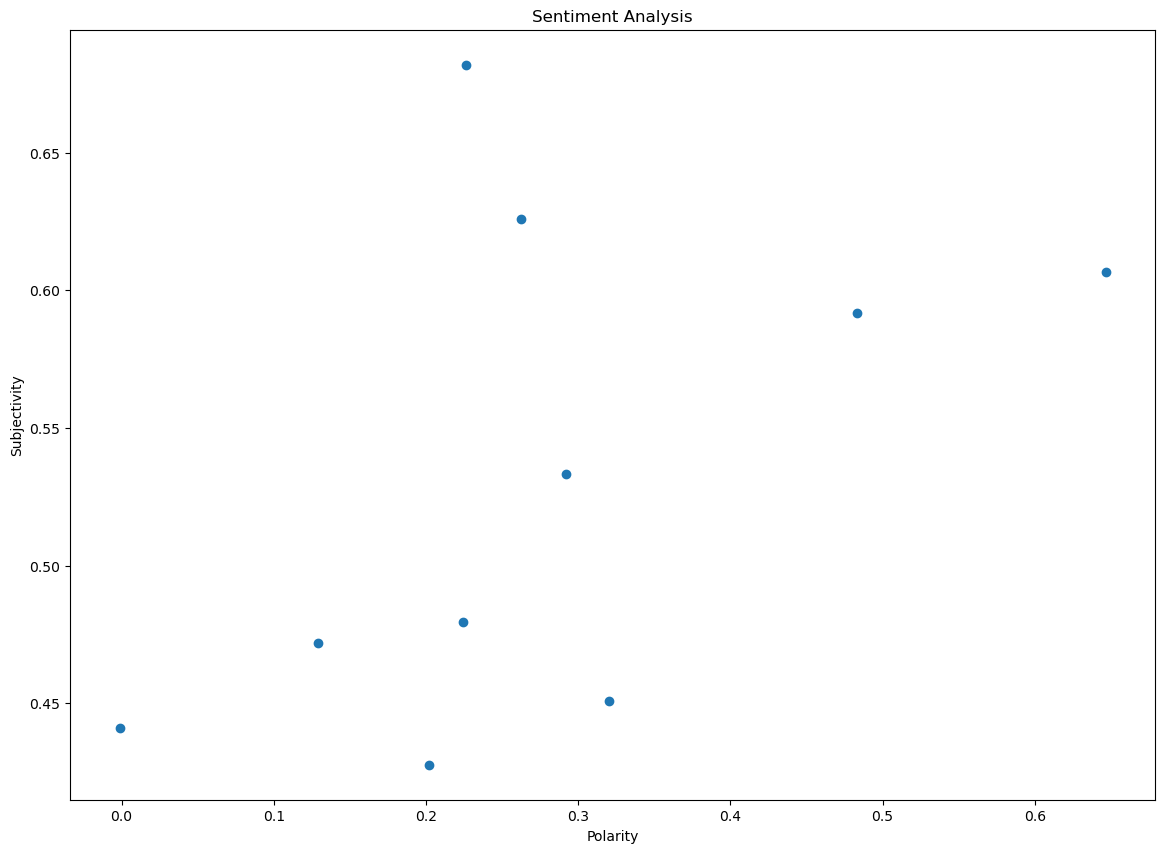

In [121]:
f, axes = plt.subplots(figsize = (14,10))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity');

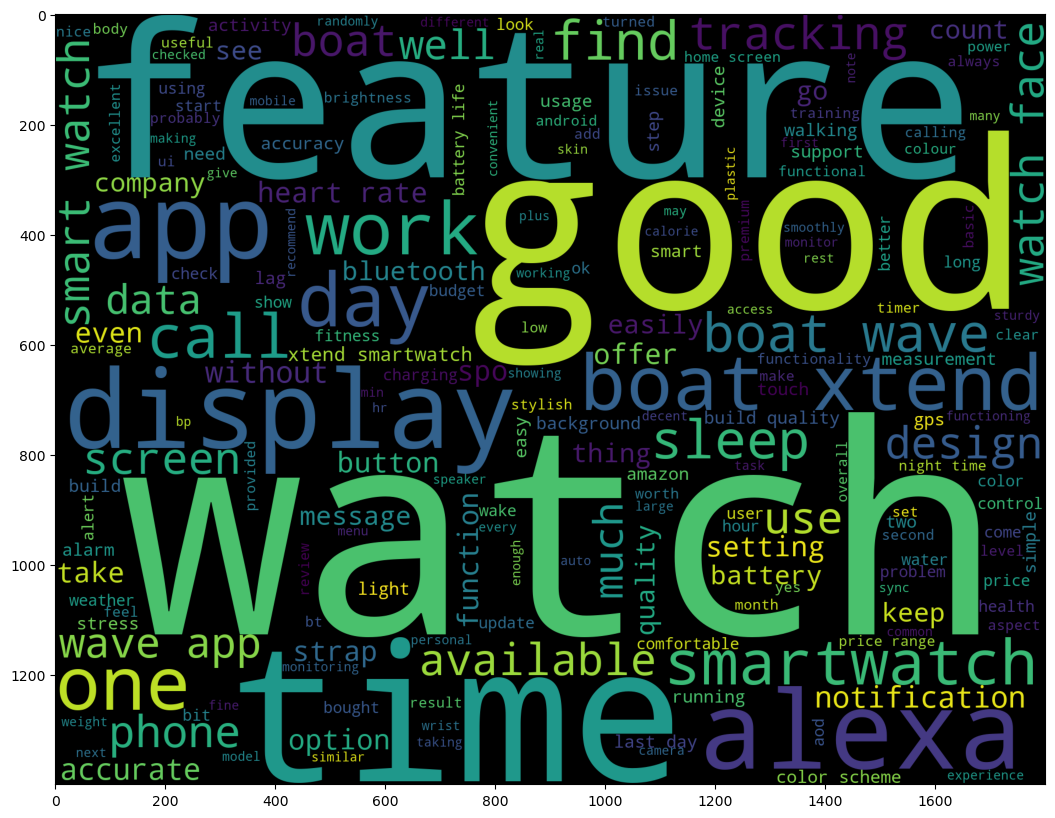

In [123]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(14,10))
wordcloud= WordCloud(background_color = 'black', width = 1800, height =1400).generate(allWords_)
plt.imshow(wordcloud);

A. Most common words in positive Review

In [124]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14,10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

B. Most common words in negative Review

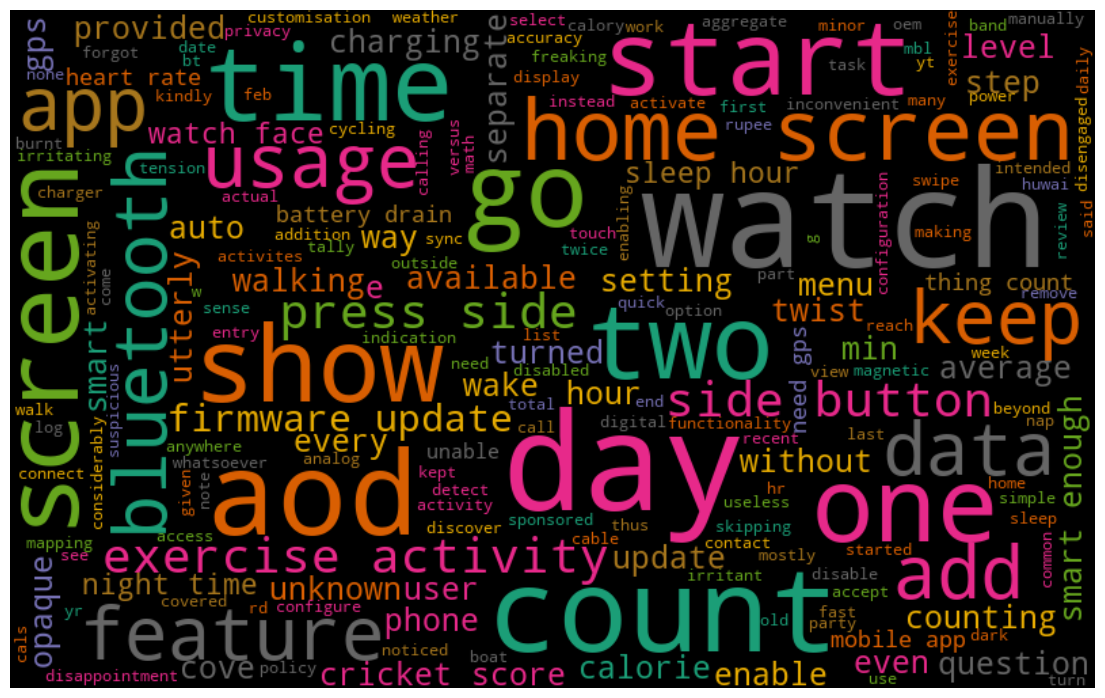

In [125]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)

# The END !!!